In [350]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [183]:
def toInt(a):
    return [int(x) for x in a]

In [377]:
def hist(a):
    k = round(1 + math.log(a.size, 2))
    delta =  int(((a[-1] - a[0]) + k - (a[-1] - a[0]) % k)/k)
    segments = []
    for i in [a[0] + j * delta for  j in range(k)]:
        segments.append(i)
    segments.append(a[0] + k * delta)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig('test2png.png', dpi=100)
    
    hist, bins= np.histogram(a, bins = segments)
    center = (bins[:-1] + bins[1:]) / 2
    width = bins[1] - bins[0]
    hist = [x / delta/a.size for x in hist]
    plt.bar(center, hist, align='center', width=width, color = 'lightblue' ,edgecolor = 'black')
    plt.xlim(segments[0] - 1, segments[-1] + 1)
    plt.grid(True)
    plt.xticks(segments)
    
    plt.show()

In [378]:
def bootStrap(a):
    alpha = []
    for i in range(1000):
        al = 0
        for j in range(a.size):
            al += a[rnd.randint(0, a.size - 1)]
        alpha.append(al / a.size)
    hist(np.sort(np.array(alpha)))

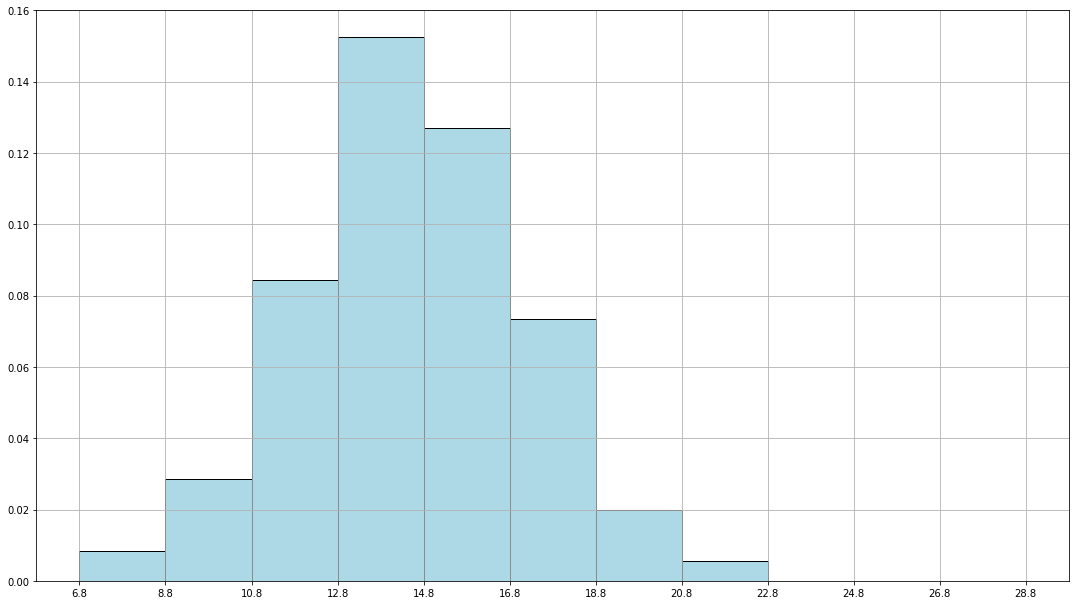

In [383]:
a = np.array([21,28,2,10,25,19,6,13,8,12])
bootStrap(np.sort(a))